### <font color='red'> Superstore Marketing Campaign. </font>

#### A superstore is planning for the year-end sale. They want to launch a new offer - gold membership, that gives a 20% discount on all purchases, for only $499 which is $999 on other days. It will be valid only for existing customers and the campaign through phone calls is currently being planned for them. The management feels that the best way to reduce the cost of the campaign is to make a predictive model which will classify customers who might purchase the offer.

#### Our data has 2240 values and 22 columns, Here we will use the "superstore_data.csv" database that has been made available for use, below you will see an analysis of the data, the processing of that data and the use of machine learning classification models to achieve our goal.

#### Importing Libraries.

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

## <font color='blue'> 1. Importing Dataset. </font>

#### Here we are reading the database using the name "df" in the variable.

In [2]:
df=pd.read_csv("marketing_campaign.csv",sep=";")


#### Here we can see that we have categorical and continuous variables, we can also see that we have this column ID that will probably not be used, we can also see that we have some null values.

#### Here the explanation about the variables:

- Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
- ID - Unique ID of each customer
- Year_Birth - Age of the customer
- Complain - 1 if the customer complained in the last 2 years
- Dt_Customer - date of customer's enrollment with the company
- Education - customer's level of education
- Marital - customer's marital status
- Kidhome - number of small children in customer's household
- Teenhome - number of teenagers in customer's household
- Income - customer's yearly household income
- MntFishProducts - the amount spent on fish products in the last 2 years
- MntMeatProducts - the amount spent on meat products in the last 2 years
- MntFruits - the amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - the amount spent on wine products in the last 2 years
- MntGoldProds - the amount spent on gold products in the last 2 years
- NumDealsPurchases - number of purchases made with discount
- NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)
- NumStorePurchases - number of purchases made directly in stores
- NumWebPurchases - number of purchases made through the company's website
- NumWebVisitsMonth - number of visits to company's website in the last month
- Recency - number of days since the last purchase

In [3]:
pd.set_option('display.max_columns', None)
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
(df.isnull().sum()/len(df))

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

#### Let's fill our null values ​​of the Income variable with Mode.

In [8]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [9]:
(df.isnull().sum()/len(df))

ID                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntWines               0.0
MntFruits              0.0
MntMeatProducts        0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
AcceptedCmp3           0.0
AcceptedCmp4           0.0
AcceptedCmp5           0.0
AcceptedCmp1           0.0
AcceptedCmp2           0.0
Complain               0.0
Z_CostContact          0.0
Z_Revenue              0.0
Response               0.0
dtype: float64

In [10]:
df = df.drop(['Z_CostContact', 'Z_Revenue','MntWines', 'MntMeatProducts','ID', 'Dt_Customer'], axis = 1)


## <font color='blue'> 2. Data Analysis. </font>

#### Verifying the correlation between our variables.
- We can see that we have some correlations above 0.60, so let's remove the MntWines and MntMeatProducts variables

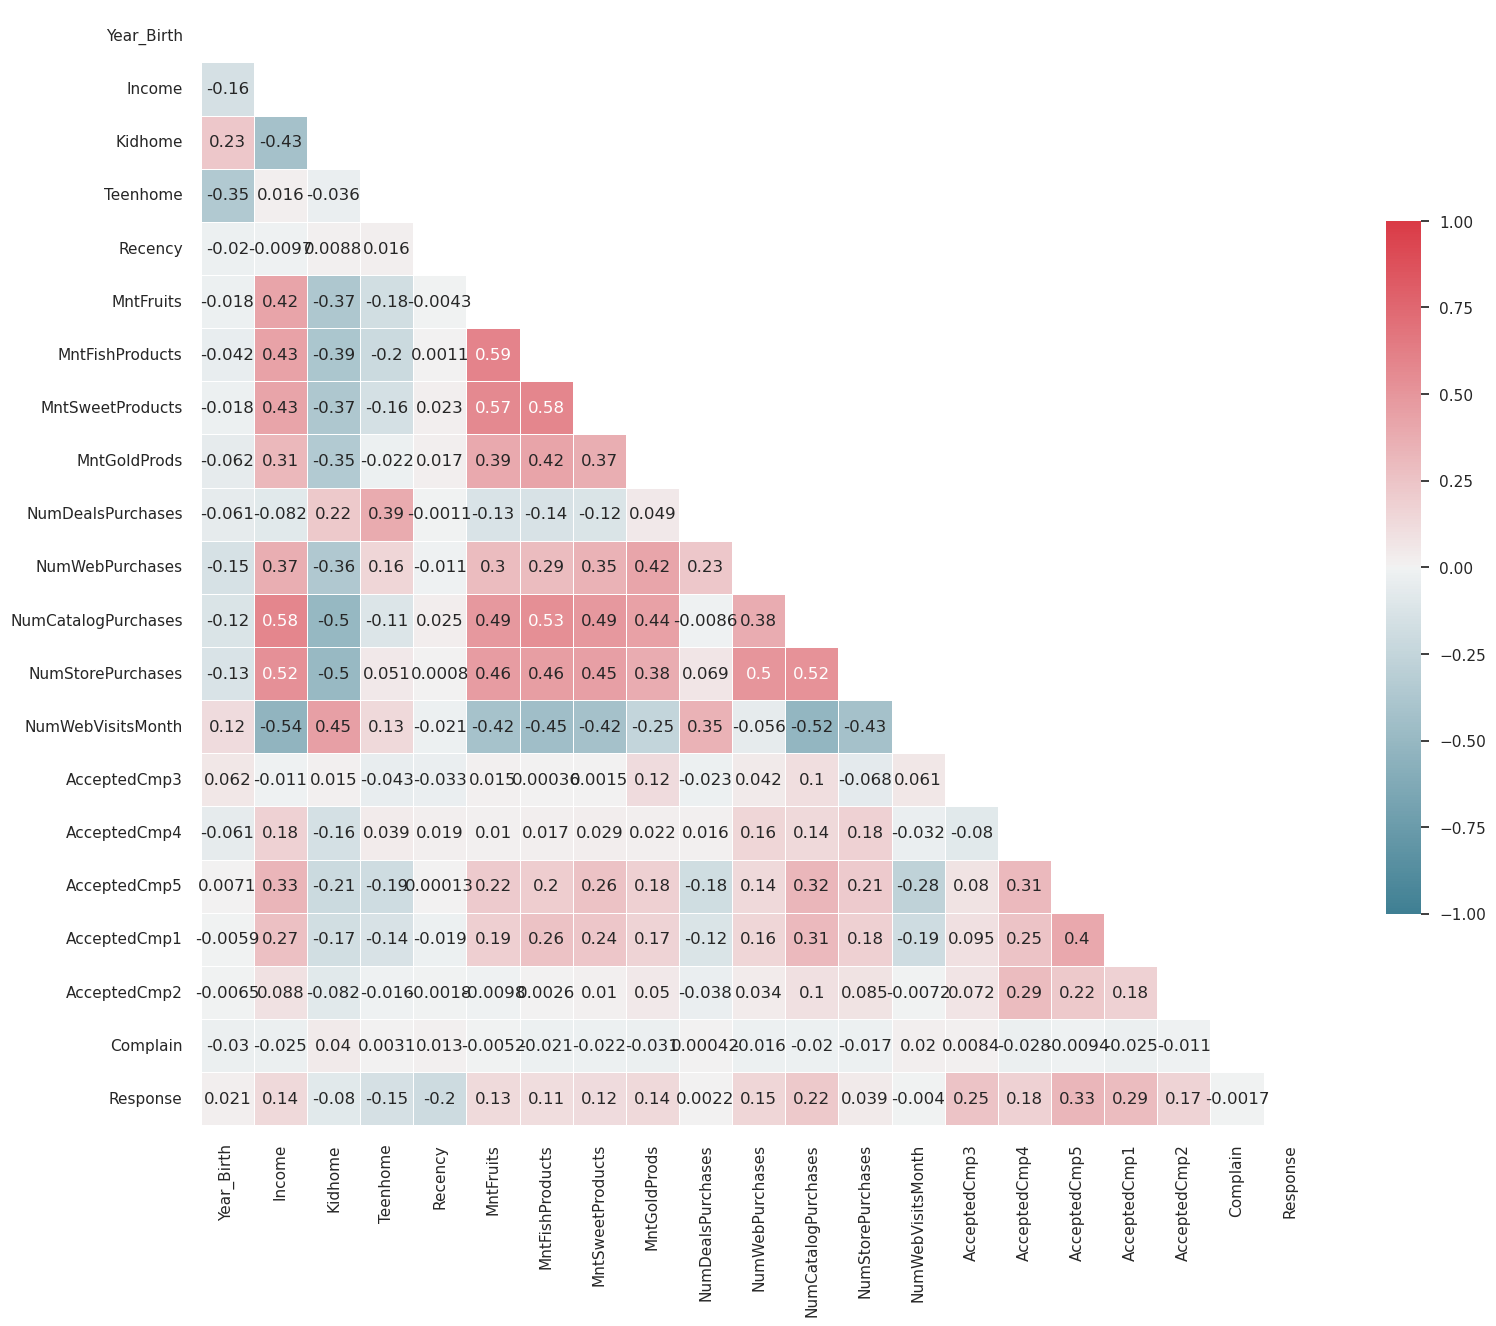

In [11]:
sns.set(style="white")

#Mask
mask = np.zeros_like(df.corr(),dtype=bool)
mask[np.triu_indices_from(mask)]= True
#figure
f, ax = plt.subplots(figsize= (18,18))
#colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#heatmap+mask+ correct ratio
sns.heatmap(df.corr(), mask= mask, cmap= cmap, vmax=1, center=0, vmin= -1,
            square=True, linewidths = .5, cbar_kws={'shrink': .5, }, annot= True)
plt.show()

#### Categorical Variables

#### Looking at our categorical variables we managed to get some views, most of our data are from graduates, although we have a lot of data from singles, they are usually married/cohabiting clients, the data is well divided between those who have children and those who do not, we can see that the greater the number of purchases in the month, the less data we have, it is also interesting to see that customers usually visit the site an average of 7 times a month, when we look at the Complain variable we see that we have few complaints, and looking at our variable target we can see that most of the data is negative response.

<AxesSubplot:title={'center':'Variable Complain'}, xlabel='Complain', ylabel='count'>

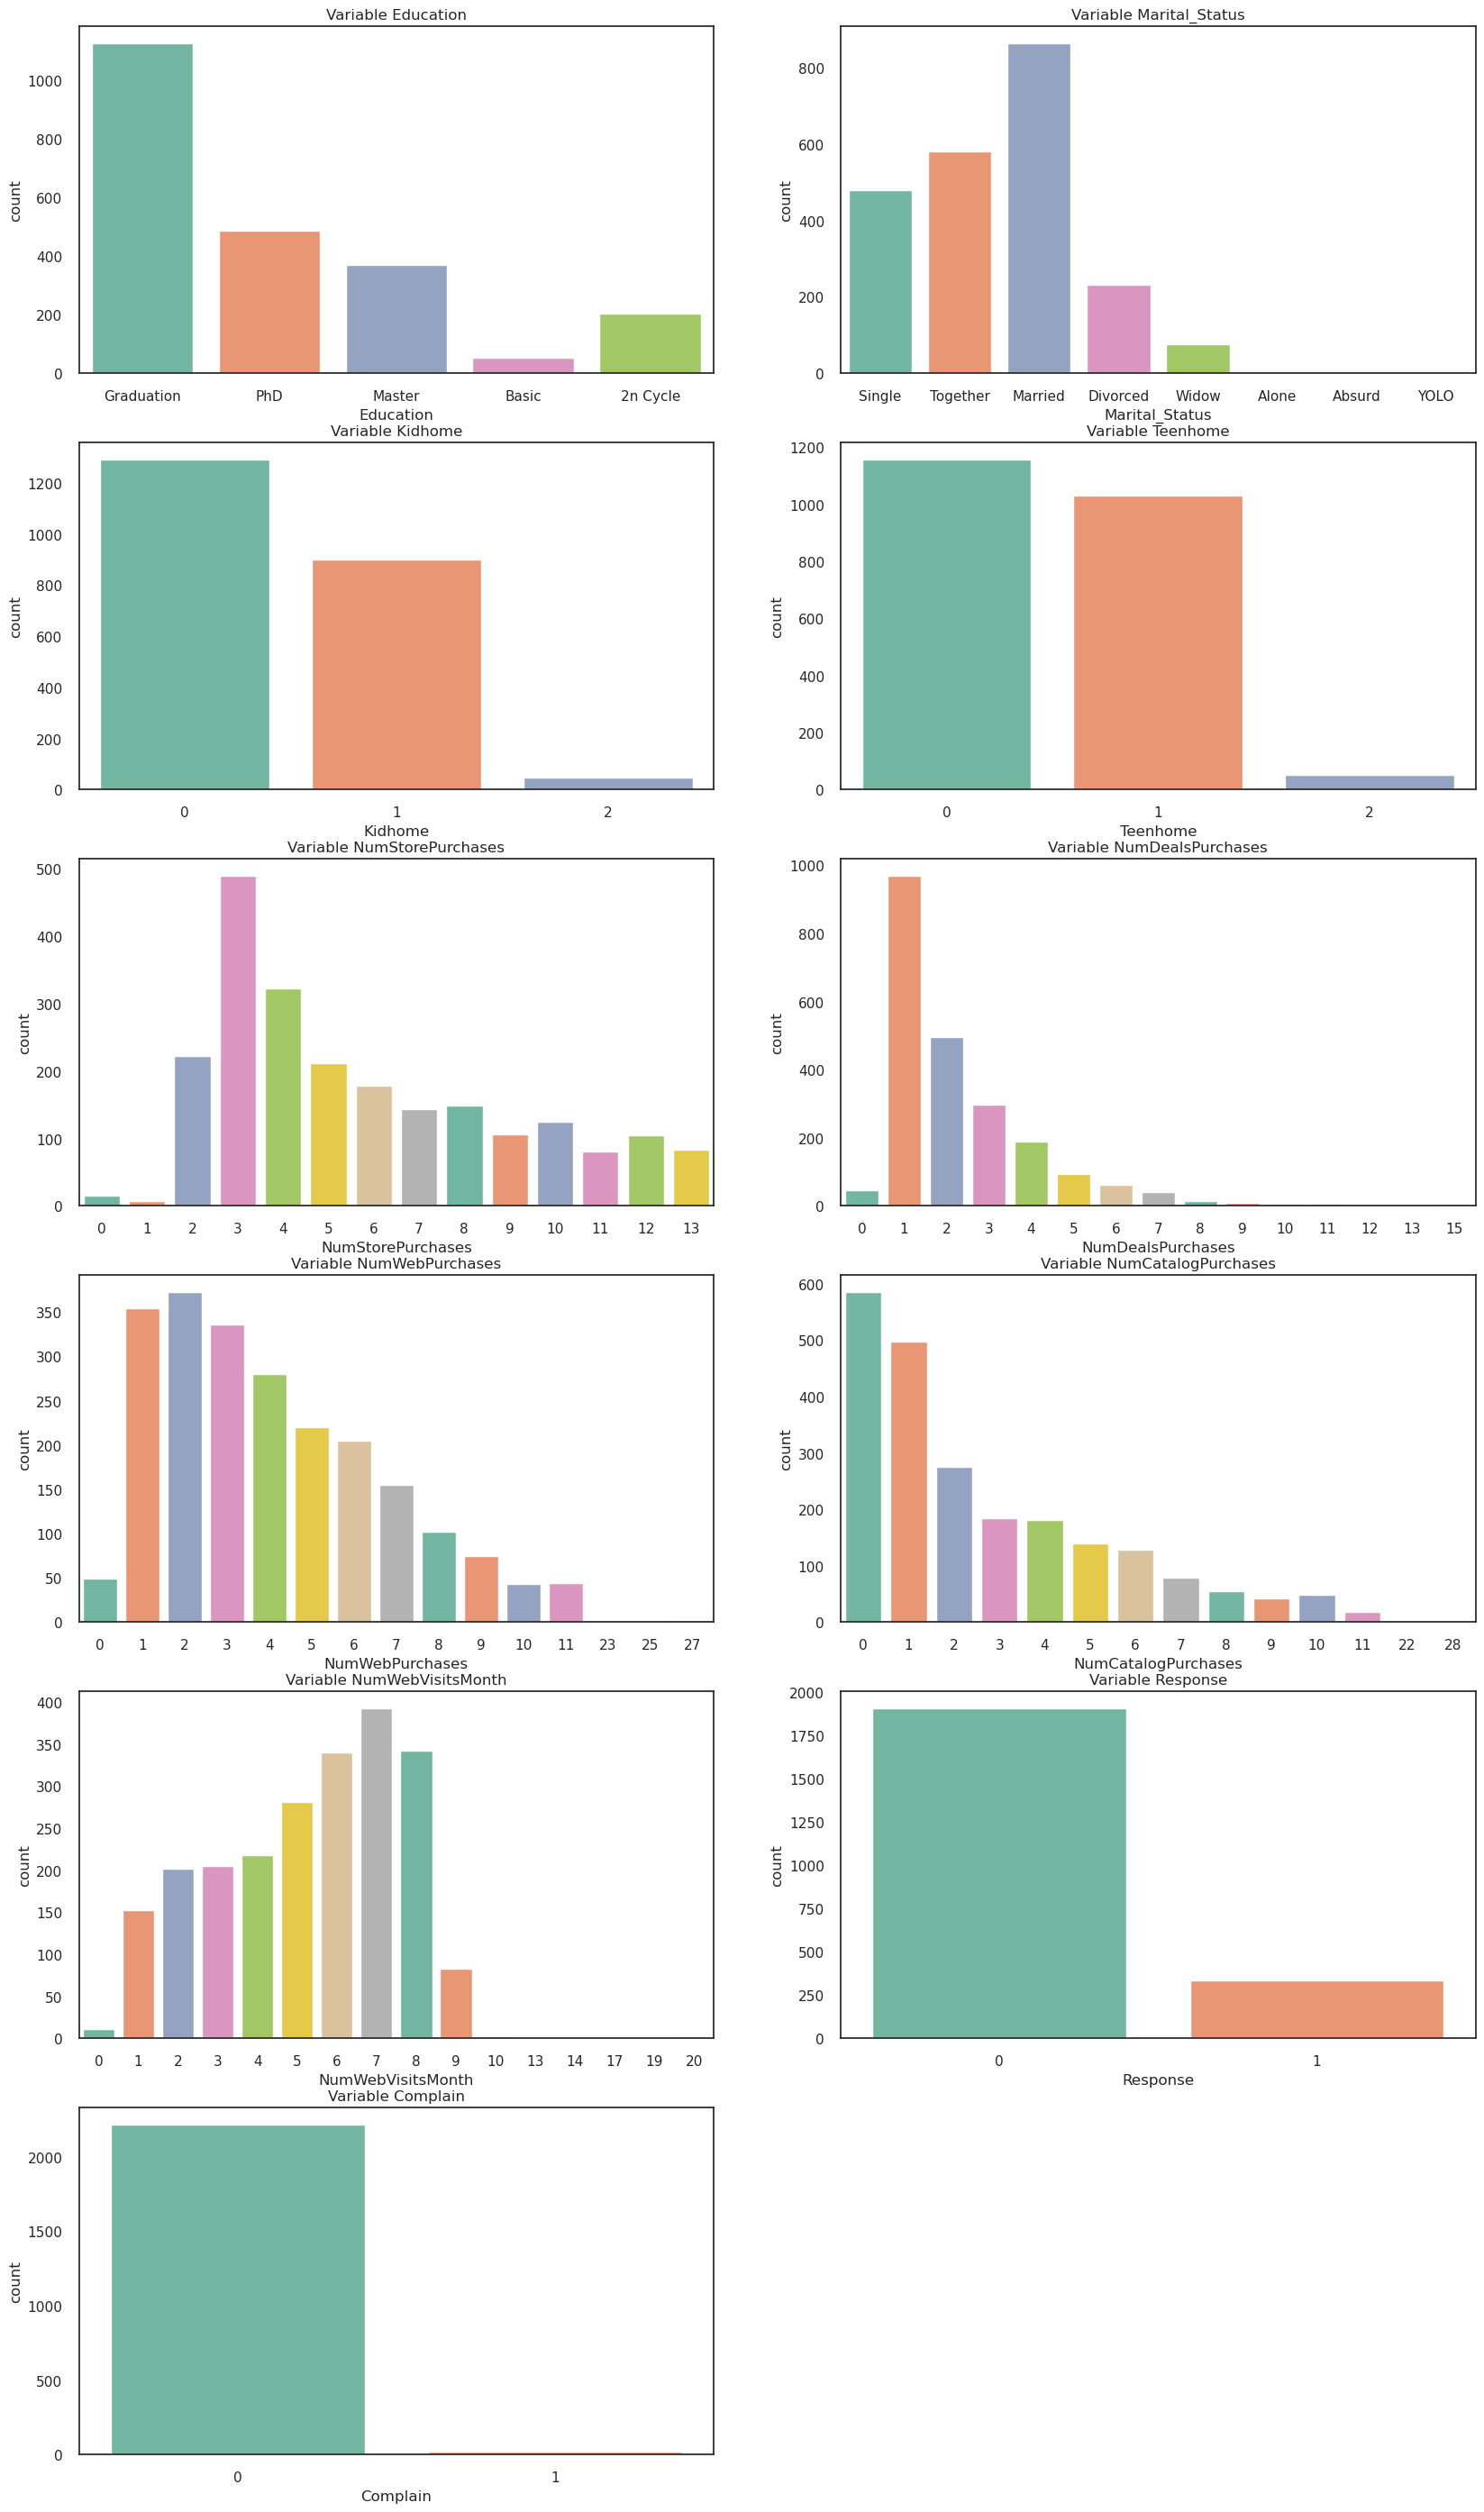

In [13]:
plt.figure(figsize = (20,35))

plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(6,2,2)
plt.gca().set_title('Variable Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)

plt.subplot(6,2,3)
plt.gca().set_title('Variable Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Set2', data = df)

plt.subplot(6,2,4)
plt.gca().set_title('Variable Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Set2', data = df)

plt.subplot(6,2,5)
plt.gca().set_title('Variable NumStorePurchases')
sns.countplot(x = 'NumStorePurchases', palette = 'Set2', data = df)

plt.subplot(6,2,6)
plt.gca().set_title('Variable NumDealsPurchases')
sns.countplot(x = 'NumDealsPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,7)
plt.gca().set_title('Variable NumWebPurchases')
sns.countplot(x = 'NumWebPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,8)
plt.gca().set_title('Variable NumCatalogPurchases')
sns.countplot(x = 'NumCatalogPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,9)
plt.gca().set_title('Variable NumWebVisitsMonth')
sns.countplot(x = 'NumWebVisitsMonth', palette = 'Set2', data = df)

plt.subplot(6,2,10)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

plt.subplot(6,2,11)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

#### Continuous Variables

#### Looking at our continuous variables we can see that most of our customers are adults, followed by seniors, when we look at the variable Income we can see that we have a concentration of prices between 0 and 10000 with some data above that value, we can see that the variable Recency is well balanced, when we look at the amount spent on certain products, the higher the spend, the lower the amount of data.

<AxesSubplot:xlabel='MntGoldProds', ylabel='Count'>

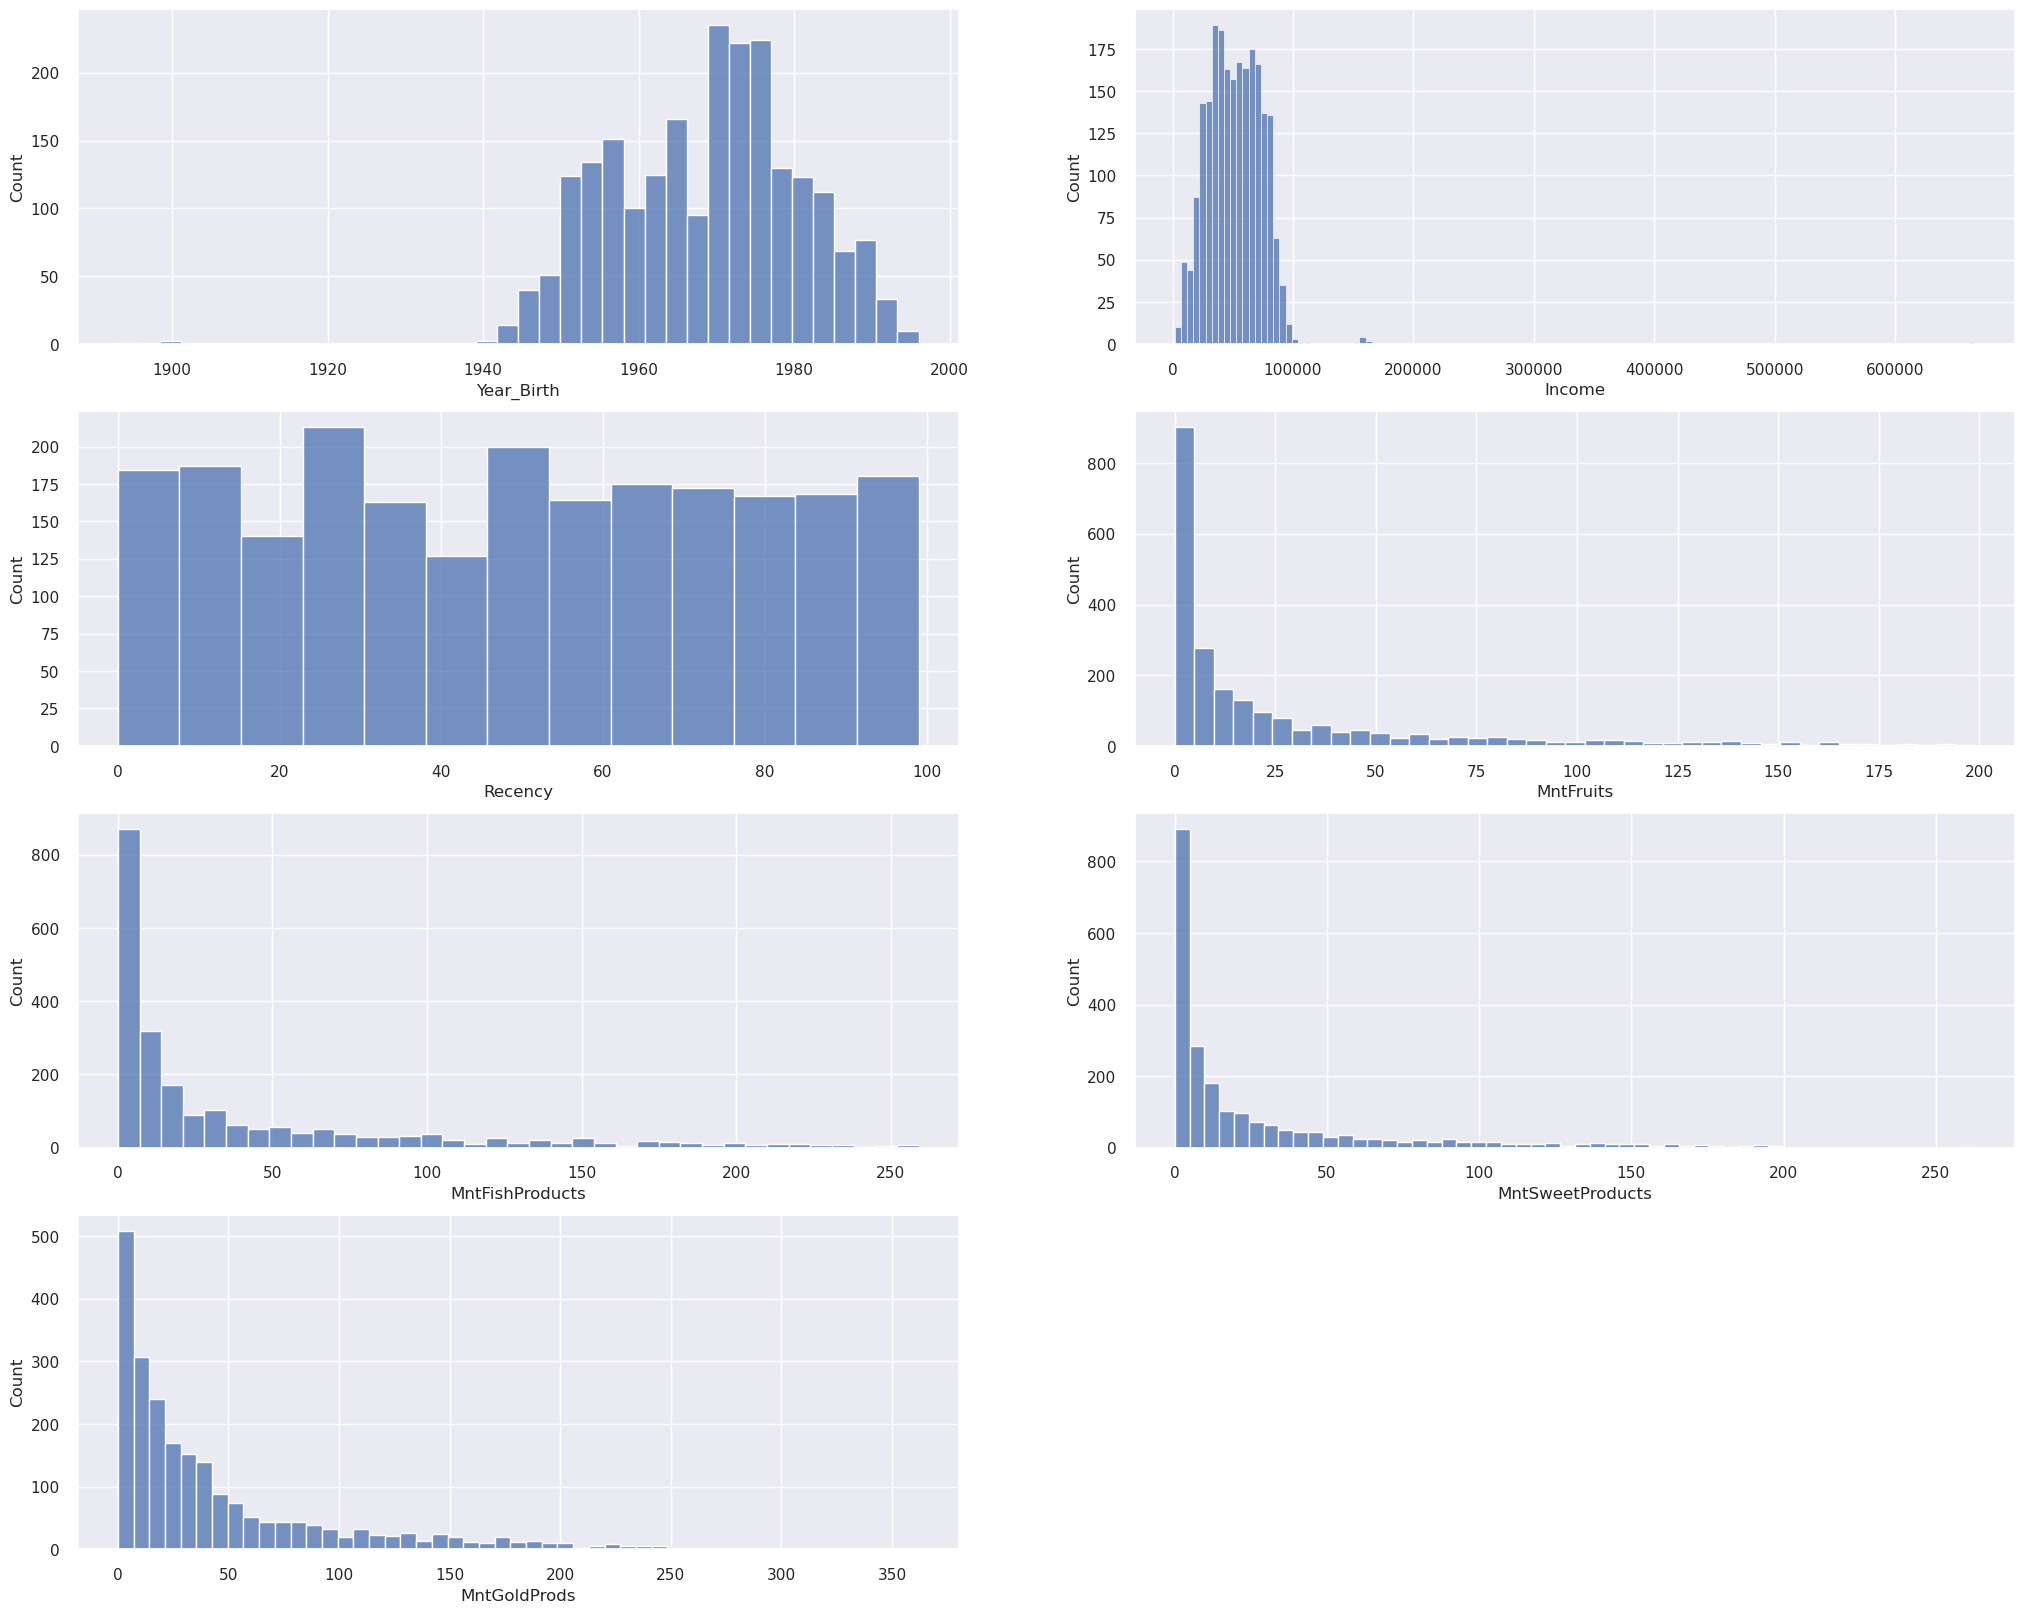

In [14]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(df['Year_Birth'], kde = False)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = False)

plt.subplot(4,2,3)
sns.histplot(df['Recency'], kde = False)

plt.subplot(4,2,4)
sns.histplot(df['MntFruits'], kde = False)

plt.subplot(4,2,5)
sns.histplot(df['MntFishProducts'], kde = False)

plt.subplot(4,2,6)
sns.histplot(df['MntSweetProducts'], kde = False)

plt.subplot(4,2,7)
sns.histplot(df['MntGoldProds'], kde = False)

#### In the boxplot of the age variable we can see that we have some data that were born before 1900, this data is very strange, so I thought it best to remove them.

<AxesSubplot:title={'center':'Boxplot Year_Birth'}, xlabel='Year_Birth'>

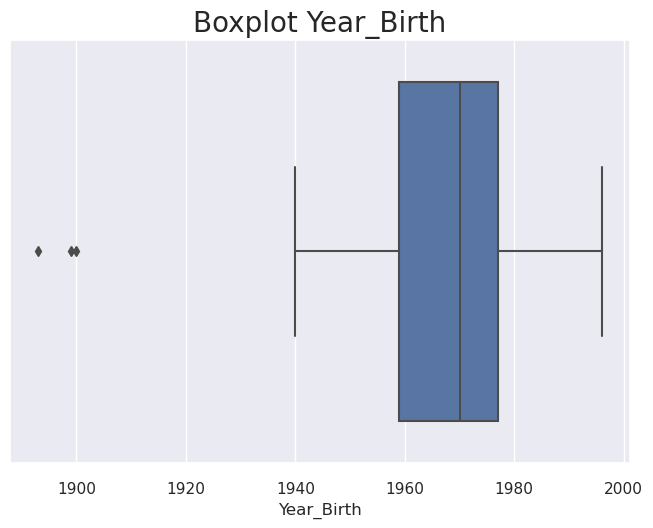

In [15]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

In [16]:
df[df['Year_Birth'] < 1920]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,99,6,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,23,0,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,36,144,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [17]:
df = df[df['Year_Birth'] > 1920]

<AxesSubplot:title={'center':'Boxplot Year_Birth'}, xlabel='Year_Birth'>

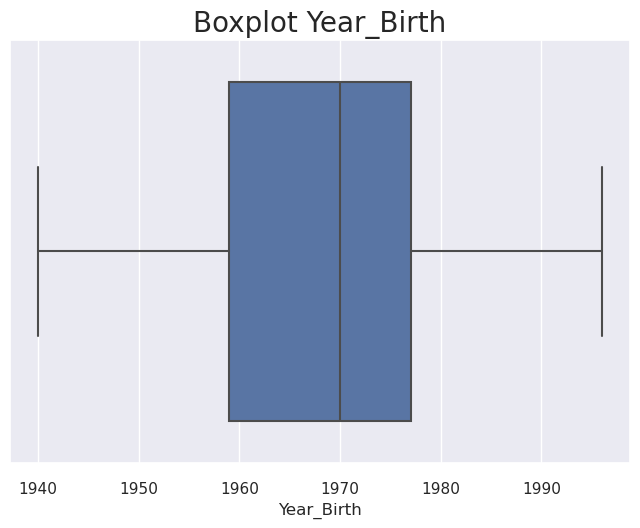

In [18]:
plt.title("Boxplot Year_Birth", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Year_Birth"])

#### Looking at our Income variable, we see this giant outlier, so let's remove it so as not to influence the model.

<AxesSubplot:title={'center':'Boxplot Income'}, xlabel='Income'>

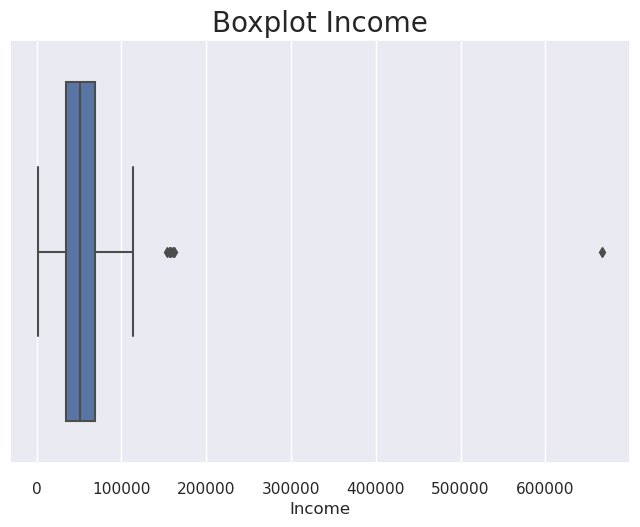

In [19]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

In [20]:
df = df[df['Income'] < 400000]

<AxesSubplot:title={'center':'Boxplot Income'}, xlabel='Income'>

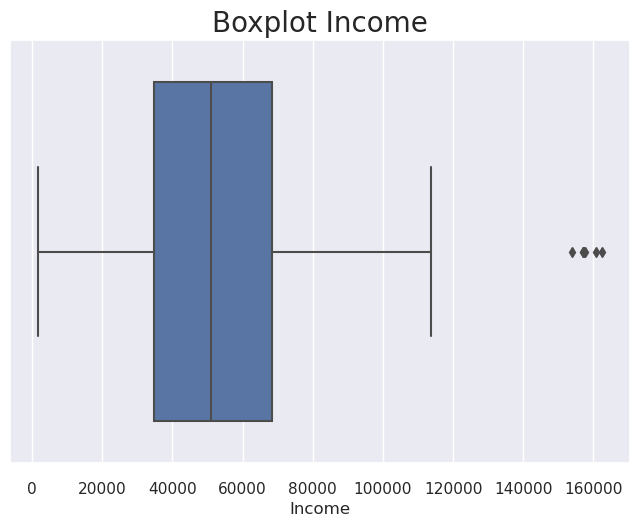

In [21]:
plt.title("Boxplot Income", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Income"])

<AxesSubplot:title={'center':'Boxplot Recency'}, xlabel='Recency'>

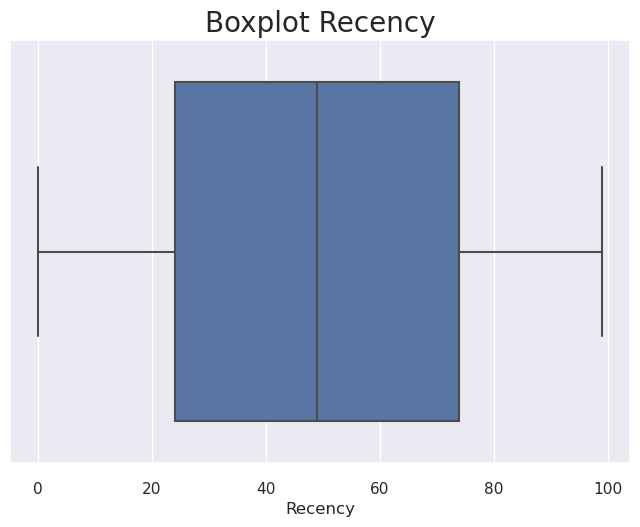

In [22]:
plt.title("Boxplot Recency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["Recency"])

<AxesSubplot:title={'center':'Boxplot MntFruits'}, xlabel='MntFruits'>

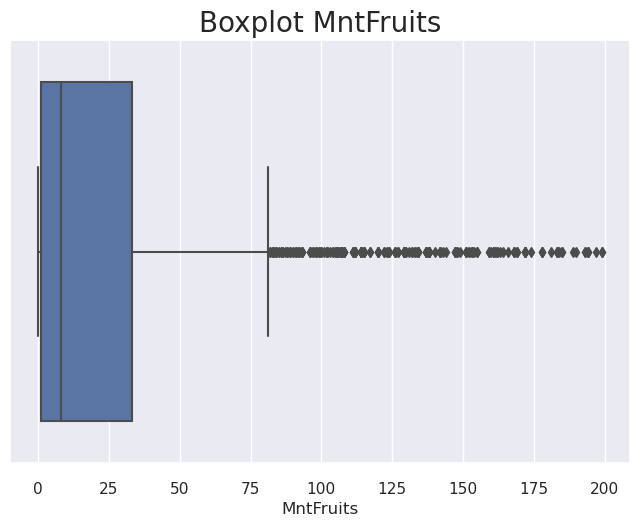

In [23]:
plt.title("Boxplot MntFruits", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFruits"])

<AxesSubplot:title={'center':'Boxplot MntFishProducts'}, xlabel='MntFishProducts'>

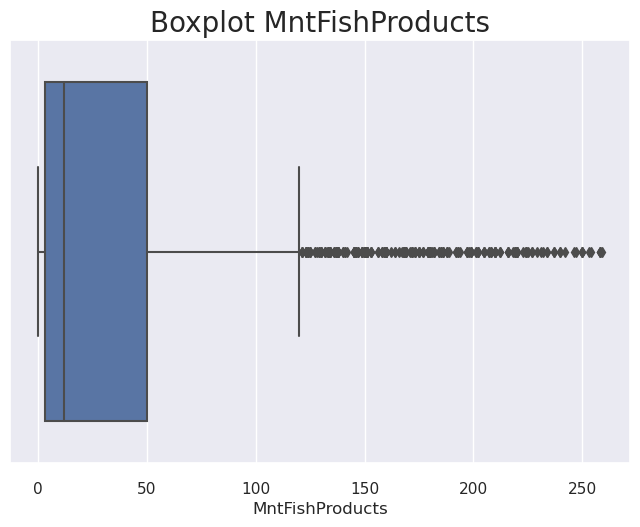

In [24]:
plt.title("Boxplot MntFishProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntFishProducts"])

<AxesSubplot:title={'center':'Boxplot MntSweetProducts'}, xlabel='MntSweetProducts'>

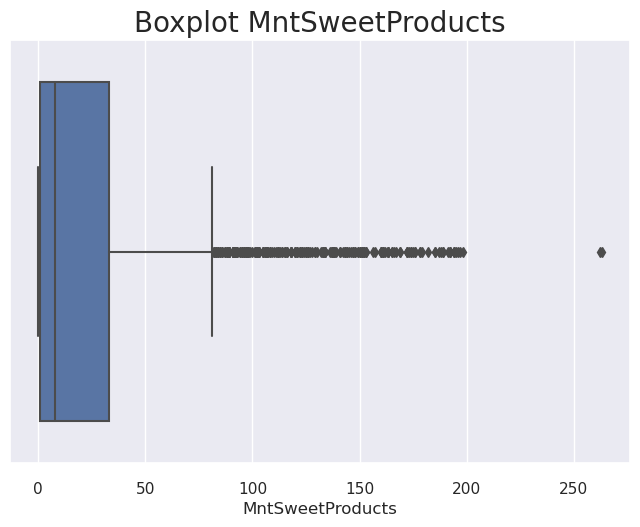

In [71]:

plt.title("Boxplot MntSweetProducts", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntSweetProducts"])

<AxesSubplot:title={'center':'Boxplot MntGoldProds'}, xlabel='MntGoldProds'>

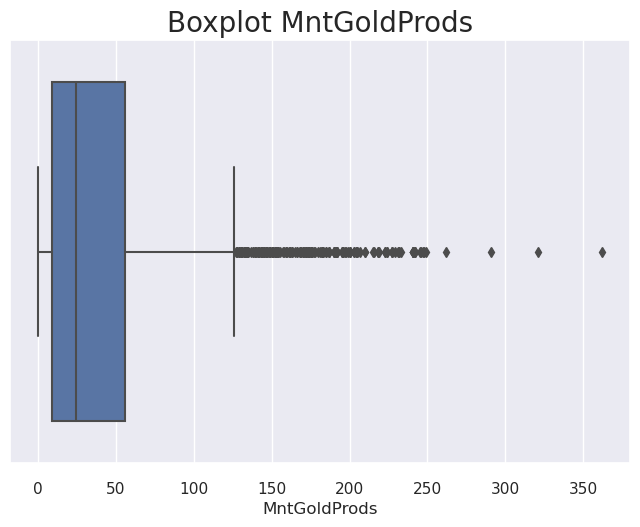

In [26]:
plt.title("Boxplot MntGoldProds", fontdict = {'fontsize': 20})
sns.boxplot(x=df["MntGoldProds"])

#### Bivariate Analysis

#### Comparing our Target variable with our categorical variables I couldn't find a very unbalanced relationship

<AxesSubplot:xlabel='Complain', ylabel='count'>

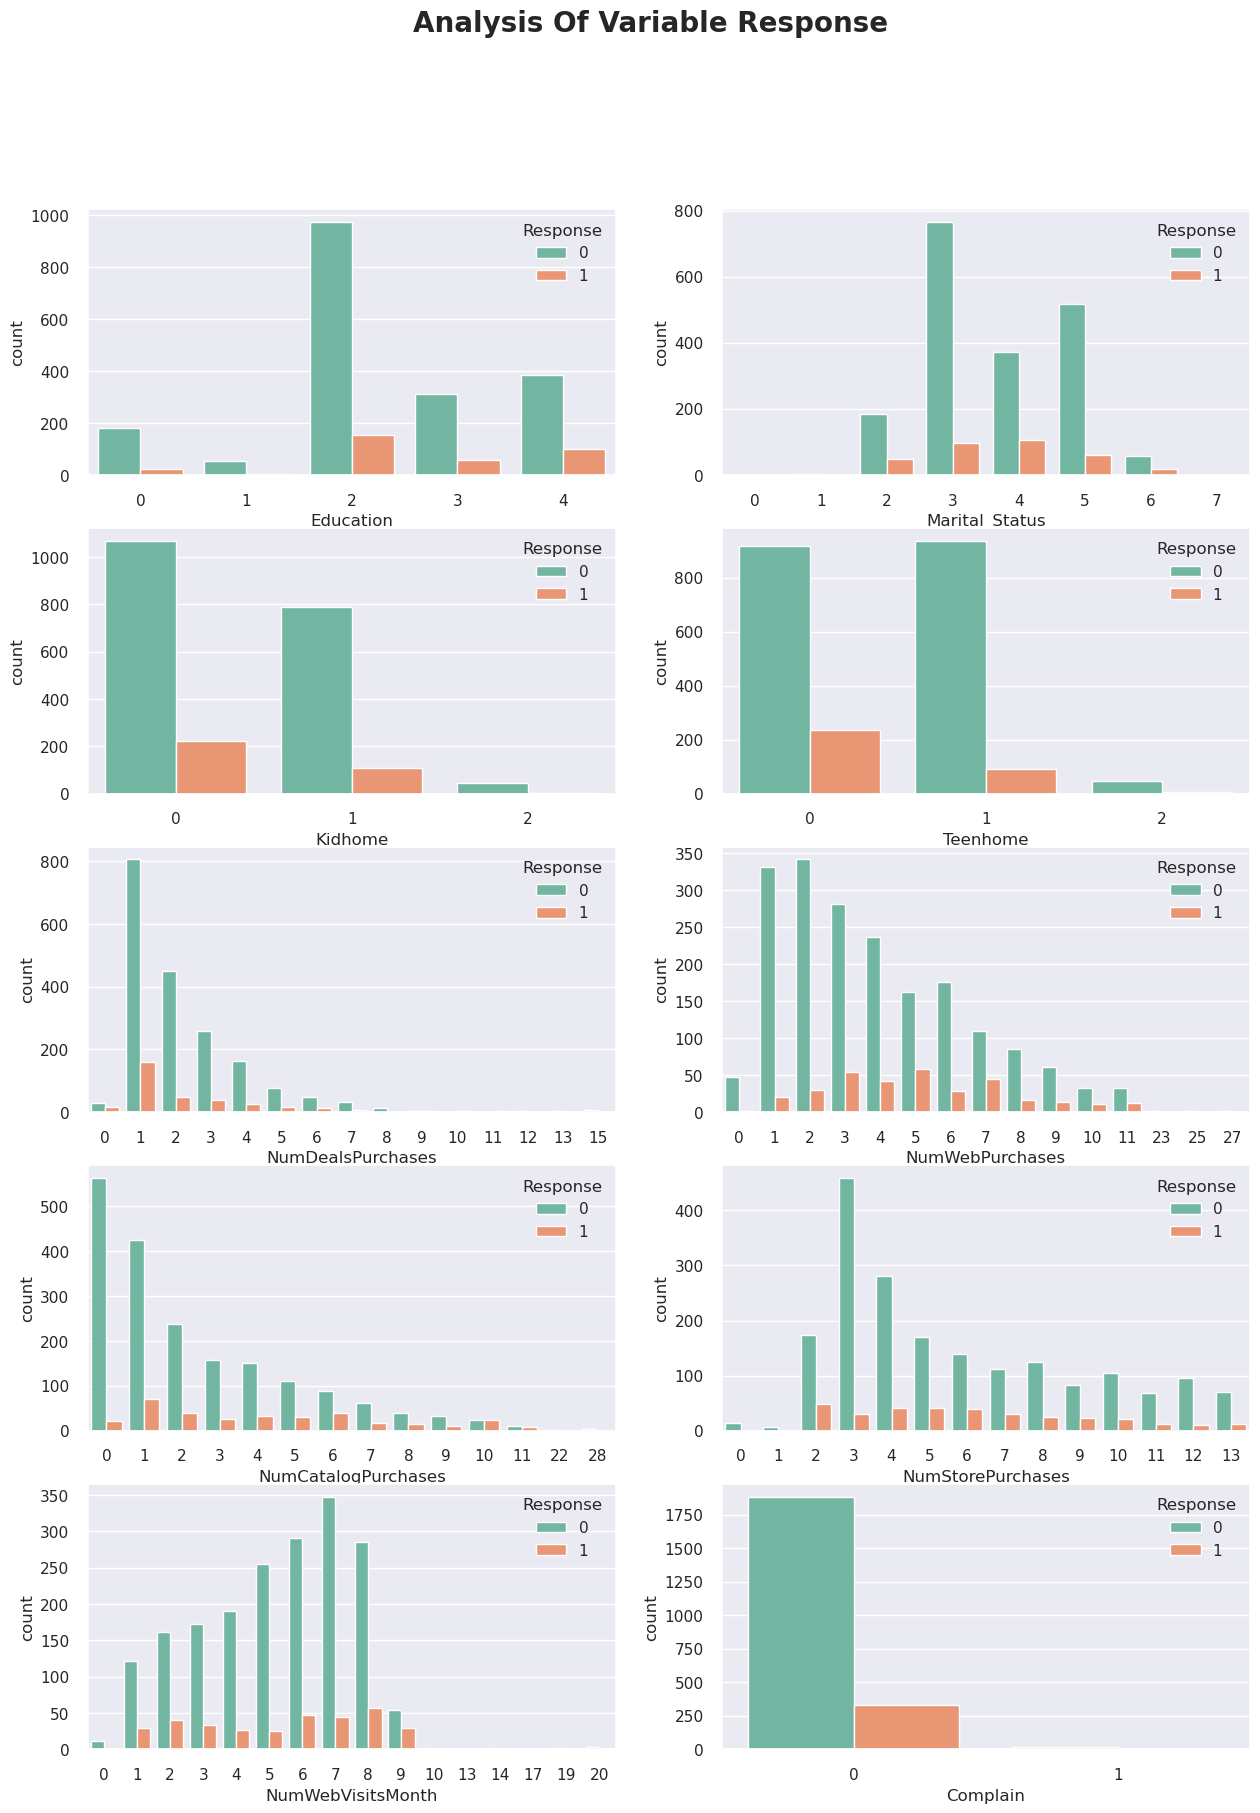

In [72]:
plt.figure(figsize = (15, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Education', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Marital_Status', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Kidhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Teenhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'NumDealsPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'NumWebPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'NumCatalogPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'NumStorePurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,9)
sns.countplot(x = 'NumWebVisitsMonth', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,10)
sns.countplot(x = 'Complain', hue = 'Response', palette = 'Set2', data = df)

#### Now, comparing the Target variable with our continuous variables, we managed to find a pattern, practically in all variables, the greater the expense, the more inclined the person is to give a positive answer, the only variable that does the opposite of that is Recency and it is which is more unbalanced, we can see that we have a good difference when compared to the target variable, the smaller the value of the variable Recency, the more likely to have a positive response.

<AxesSubplot:xlabel='Response', ylabel='MntGoldProds'>

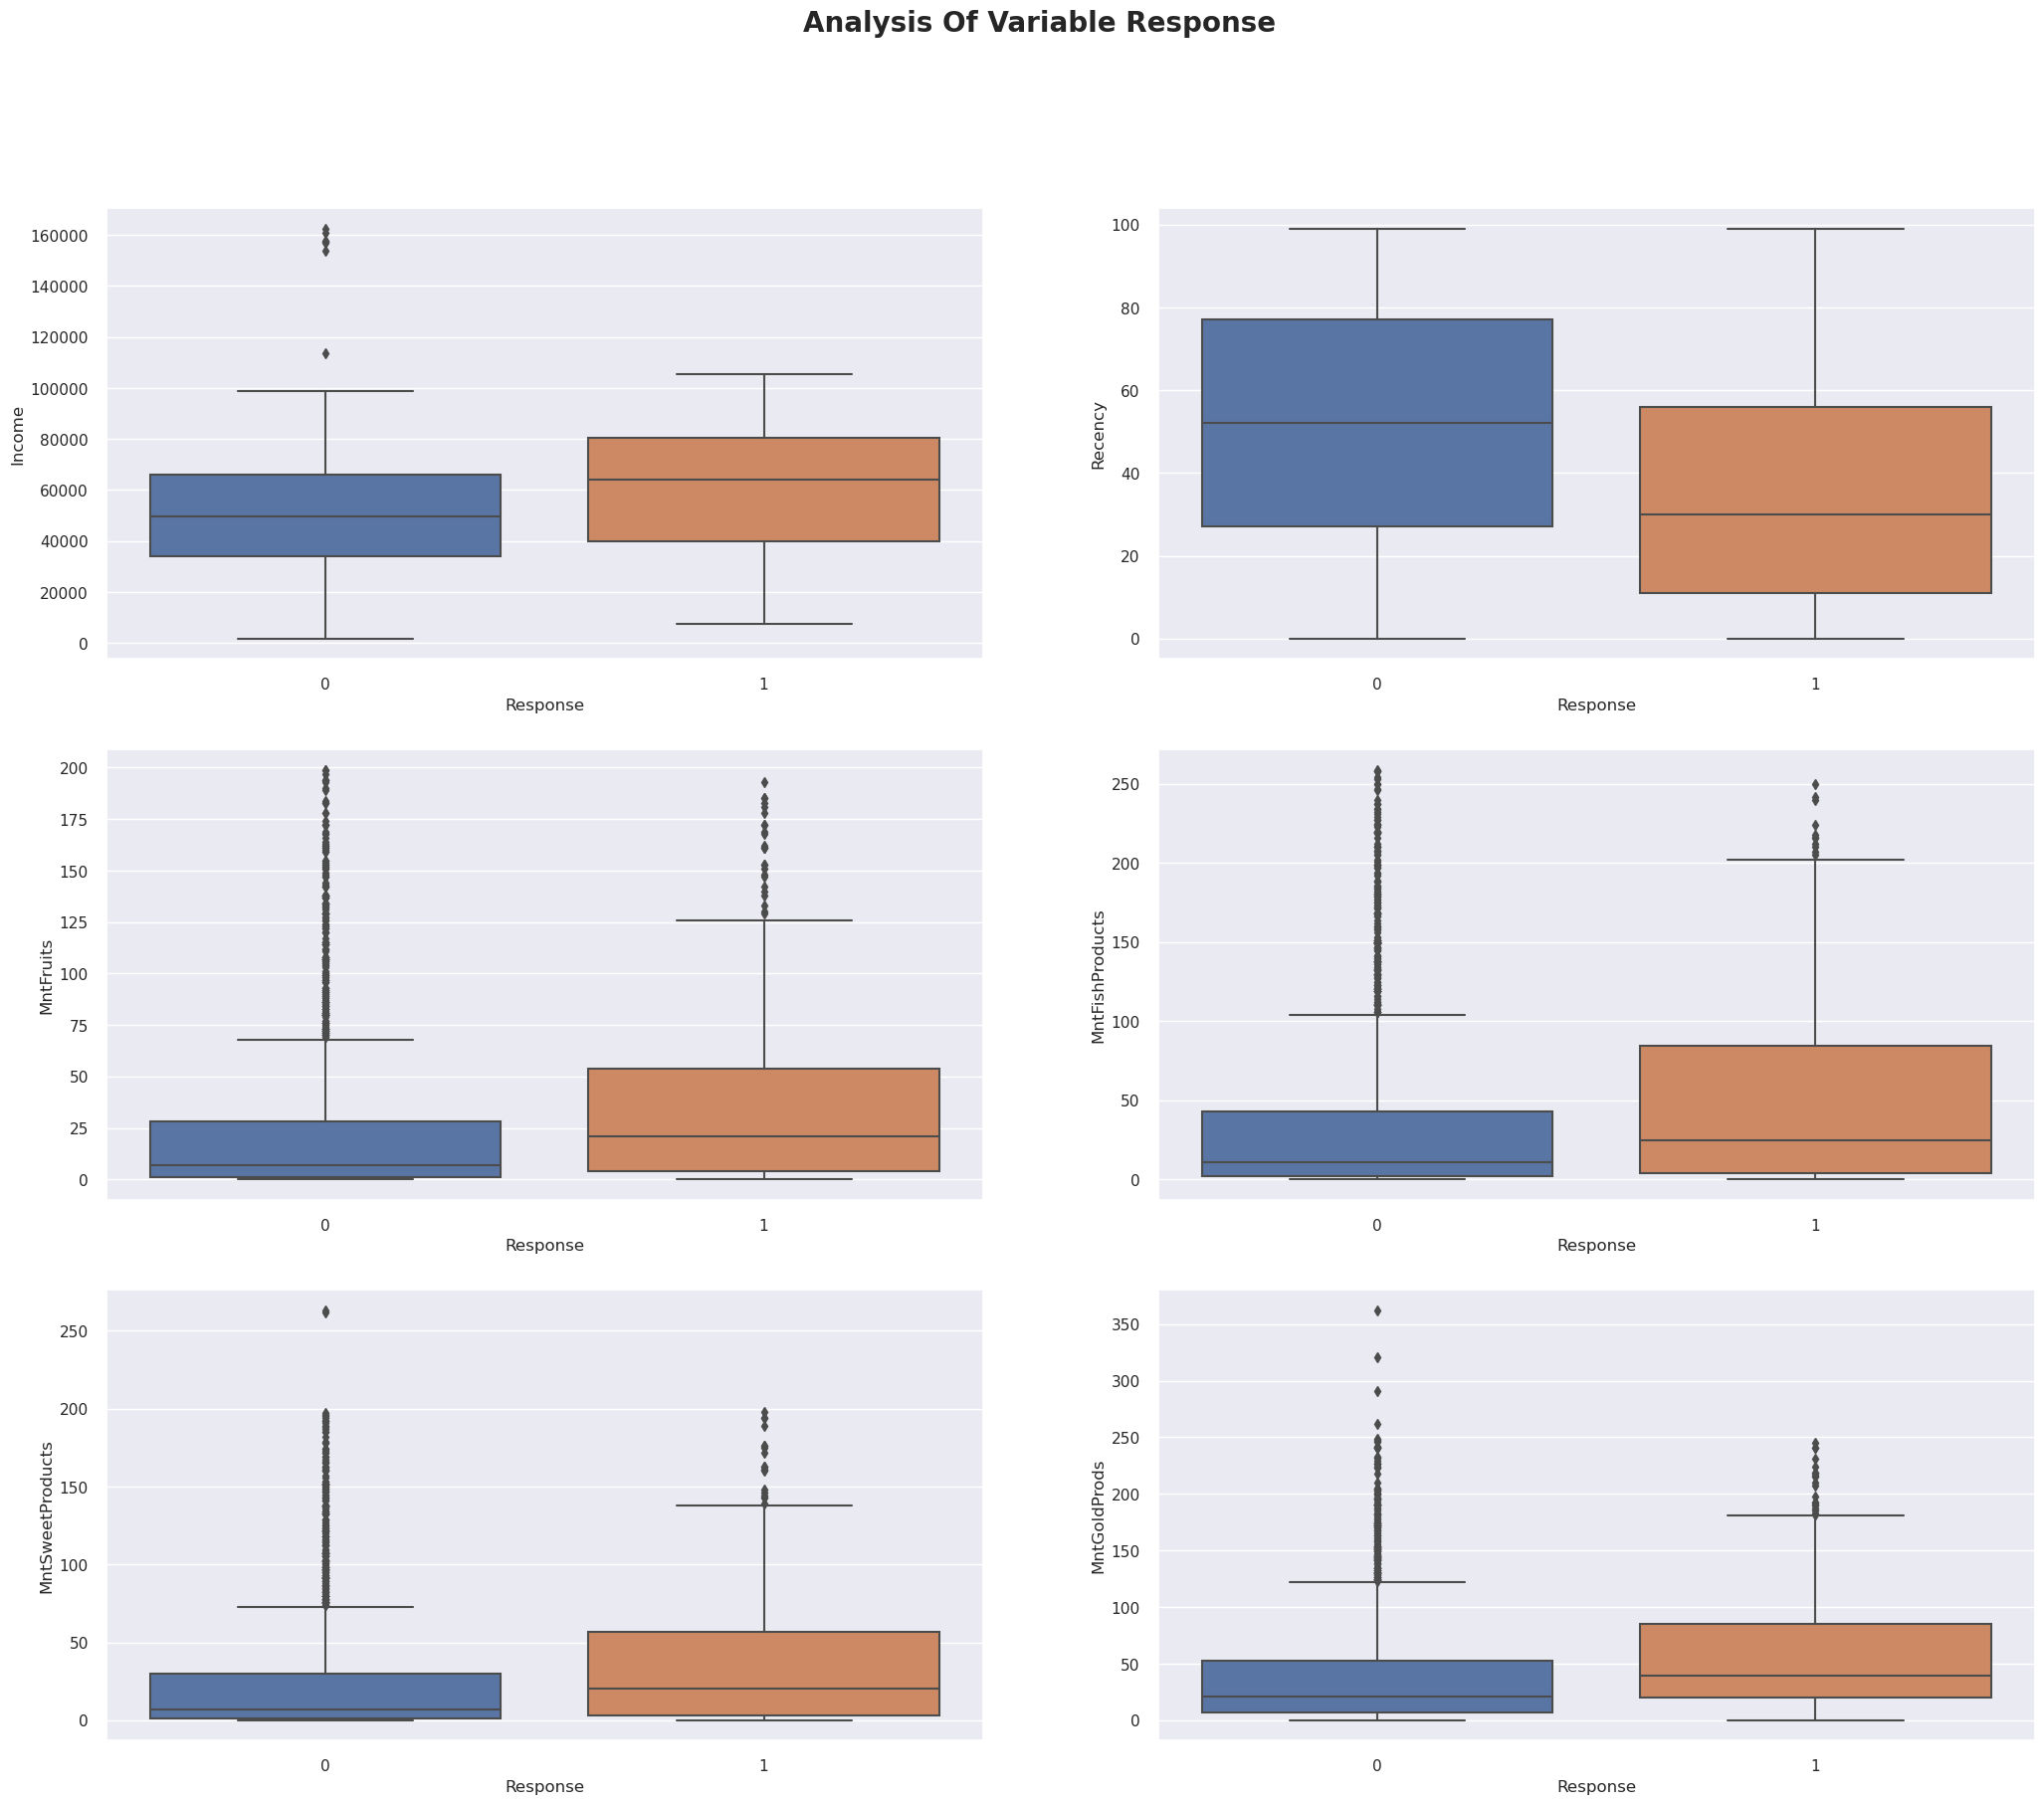

In [28]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Response", y="Income", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Response", y="Recency", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Response", y="MntFruits", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Response", y="MntFishProducts", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Response", y="MntSweetProducts", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="Response", y="MntGoldProds", data=df)

## <font color='blue'> 3. Model Building. </font>

#### Label Encoder
- Here we are going to use the LabelEncoder to transform our categorical variables into numeric variables.
- Let's remove from the database the variable ID and the variable DT_Customer that don't make sense to stay in the model.

In [29]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,1957,Graduation,Single,58138.0,0,0,58,88,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,1954,Graduation,Single,46344.0,1,1,38,1,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,1965,Graduation,Together,71613.0,0,0,26,49,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,1984,Graduation,Together,26646.0,1,0,26,4,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,1981,PhD,Married,58293.0,1,0,94,43,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [30]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Education = LabelEncoder()
label_encoder_Marital_Status = LabelEncoder()

df['Education'] = label_encoder_Education.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder_Marital_Status.fit_transform(df['Marital_Status'])

#### Separating into features variables and target variable.

In [31]:
X = df.drop('Response', axis = 1)
X = X.values
y = df['Response']

#### Balancing Classes
- As we have many values ​​of a class and few values ​​of others, we will balance the classes using OverSampling to make the classes balanced.

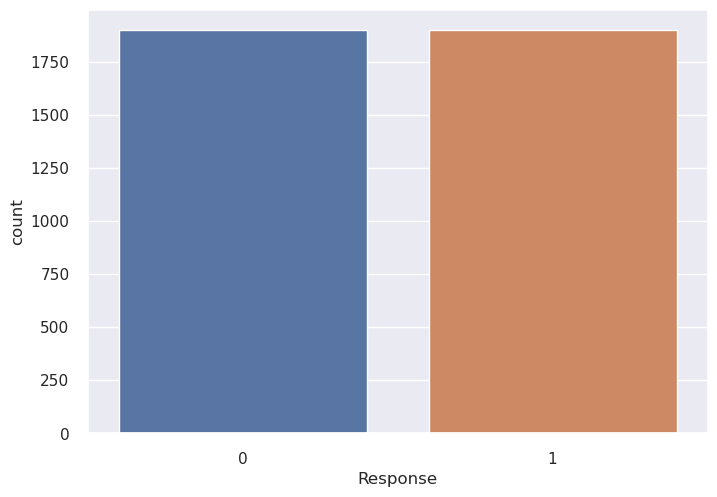

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)
ax = sns.countplot(x=y)

In [33]:
X.shape, y.shape

((3804, 22), (3804,))

#### StandardScaler
- Here we will use StandardScaler to put our data in the same scale.

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

#### Transforming Data into Train e Test, here we will use 30% of our data to test the machine learning models.

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 0)











# MOdel Comparation

#### Naive Bayes
- Running Gaussian Model.
- Here we will use the Naive Bayes Model, we will test Gaussian model, using our Normal Data.

In [36]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
previsoes = naive_bayes.predict(X_test)

#### Result

In [37]:
score_naive_gaussian = 0.6330998248686515

#### We had 63,30% accuracy, It's definitely not a good model, the model can't learn both outcomes.

0.7031523642732049

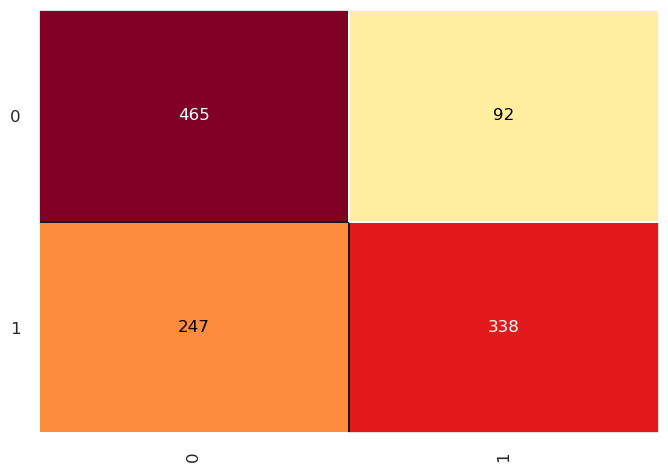

In [38]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [39]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73       557
           1       0.79      0.58      0.67       585

    accuracy                           0.70      1142
   macro avg       0.72      0.71      0.70      1142
weighted avg       0.72      0.70      0.70      1142



#### Decision Tree
- Here we will use the Decision Tree Model, we will test Entropy and Gini calculations.
- Here we are applying GridSearch to check which are the best metrics to use.

In [40]:
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
alg = ['entropy', 'gini']
values_grid = {'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = DecisionTreeClassifier()
gridDecisionTree = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridDecisionTree.fit(X_train, y_train)

print('Mín Split: ', gridDecisionTree.best_estimator_.min_samples_split)
print('Max Nvl: ', gridDecisionTree.best_estimator_.max_depth)
print('Algorithm: ', gridDecisionTree.best_estimator_.criterion)
print('Score: ', gridDecisionTree.best_score_)

Mín Split:  2
Max Nvl:  11
Algorithm:  gini
Score:  0.8951854307438388


#### Running Decision Tree

In [41]:
decision_tree = DecisionTreeClassifier(criterion = 'gini', min_samples_split = 2, max_depth= 11, random_state=0)
decision_tree.fit(X_train, y_train)
previsoes = decision_tree.predict(X_test)

#### Result

In [42]:
score_tree = 0.8861646234676007

#### We had 88,61% accuracy, Here we had a very significant improvement when compared to Naive Bayes, the model was able to predict both results.


0.9071803852889667

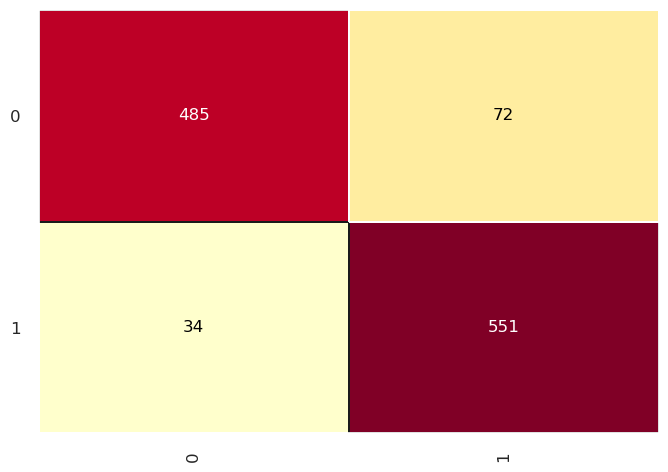

In [43]:
cm = ConfusionMatrix(decision_tree)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [44]:
classification_decision = (classification_report(y_test, previsoes))
print(classification_decision)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       557
           1       0.88      0.94      0.91       585

    accuracy                           0.91      1142
   macro avg       0.91      0.91      0.91      1142
weighted avg       0.91      0.91      0.91      1142



#### Checking the most important variables of the model

In [45]:
columns = df.drop('Response', axis = 1).columns
feature_imp = pd.Series(decision_tree.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

Recency                0.173937
AcceptedCmp5           0.124689
NumCatalogPurchases    0.098782
Income                 0.088174
MntGoldProds           0.085167
MntSweetProducts       0.069048
NumStorePurchases      0.054749
NumWebVisitsMonth      0.051595
Year_Birth             0.048709
Education              0.043611
Marital_Status         0.029811
AcceptedCmp3           0.028796
MntFruits              0.020791
MntFishProducts        0.018392
Kidhome                0.017233
NumWebPurchases        0.016572
NumDealsPurchases      0.012817
AcceptedCmp2           0.009411
AcceptedCmp1           0.004245
Teenhome               0.003472
AcceptedCmp4           0.000000
Complain               0.000000
dtype: float64

#### RandomForest
- Here we will use the Random Forest Model, we will test Entropy and Gini calculations.
- Applying GridSearch

In [46]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = np.array([100])
alg = ['entropy', 'gini']
min_split = np.array([2, 3, 4, 5, 6, 7])
max_nvl = np.array([3, 4, 5, 6, 7, 9, 11])
values_grid = {'n_estimators': n_estimators, 'min_samples_split': min_split, 'max_depth': max_nvl, 'criterion': alg}

model = RandomForestClassifier()
gridRandomForest = GridSearchCV(estimator = model, param_grid = values_grid, cv = 5)
gridRandomForest.fit(X_train, y_train)

print('Algorithm: ', gridRandomForest.best_estimator_.criterion)
print('Score: ', gridRandomForest.best_score_)
print('Mín Split: ', gridRandomForest.best_estimator_.min_samples_split)
print('Max Nvl: ', gridRandomForest.best_estimator_.max_depth)

Algorithm:  gini
Score:  0.9398863011186502
Mín Split:  2
Max Nvl:  11


#### Running Random Forest

In [47]:
random_forest = RandomForestClassifier(n_estimators = 100, min_samples_split = 2, max_depth= 11,  criterion = 'gini', random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

#### Result

In [48]:
score_random = 0.9439579684763573

#### We had 94.39% accuracy, we were able to improve even more on the Decision Tree model, this is really good model.

0.9535901926444834

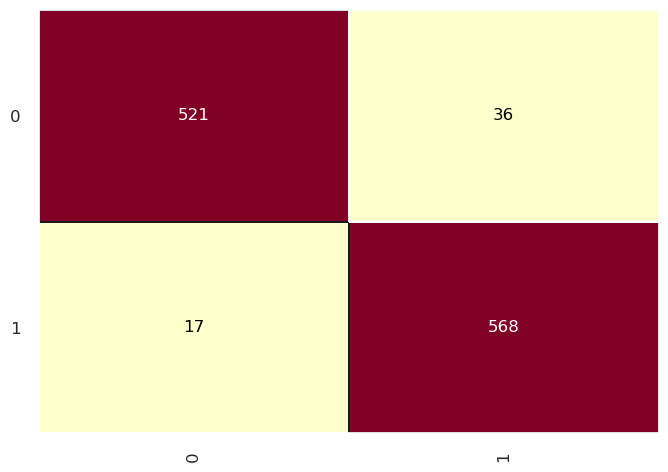

In [49]:
cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [50]:
classification_random = (classification_report(y_test, previsoes))
print(classification_random)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       557
           1       0.94      0.97      0.96       585

    accuracy                           0.95      1142
   macro avg       0.95      0.95      0.95      1142
weighted avg       0.95      0.95      0.95      1142



#### Checking the most important variables of the model

In [51]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

Recency                0.128695
MntGoldProds           0.088145
Income                 0.085996
NumCatalogPurchases    0.074608
MntSweetProducts       0.057551
NumWebVisitsMonth      0.056266
AcceptedCmp5           0.054034
MntFruits              0.051466
NumStorePurchases      0.049105
Year_Birth             0.047481
MntFishProducts        0.046019
NumWebPurchases        0.044216
AcceptedCmp3           0.039752
Education              0.036992
NumDealsPurchases      0.034527
AcceptedCmp1           0.030299
Marital_Status         0.025739
Teenhome               0.023166
Kidhome                0.010421
AcceptedCmp4           0.009513
AcceptedCmp2           0.005419
Complain               0.000590
dtype: float64

#### K-Means
- Here we will use the K Means Model.

#### 42.55% accuracy, isn't a good model.

In [52]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 2, random_state= 0)
model.fit(X_train)
previsoes = model.predict(X_test)
classification_kmeans_standard = (accuracy_score(y_test, previsoes))
print(classification_kmeans_standard)

score_kmeans = 0.425569176882662

0.39404553415061294


#### K-Neighbors
- Here we will use the K-Neighbors Model, we will use the GridSearch Model to figure out the best metrics to use in this model.
- Here we will use the GridSearch to figure out the best metrics to use in this model.

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

k_list = list(range(1,10))
k_values = dict(n_neighbors = k_list)
grid = GridSearchCV(knn, k_values, cv = 2, scoring = 'accuracy', n_jobs = -1)
grid.fit(X_train, y_train)


grid.best_params_, grid.best_score_

({'n_neighbors': 1}, 0.8688955672426747)

#### Running K-Neighbors

In [54]:
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

#### Result

#### We had 92.73% accuracy, it's a great model, but compared to others, we have better results.

In [55]:
score_knn = 0.8314606741573034

0.9422066549912435

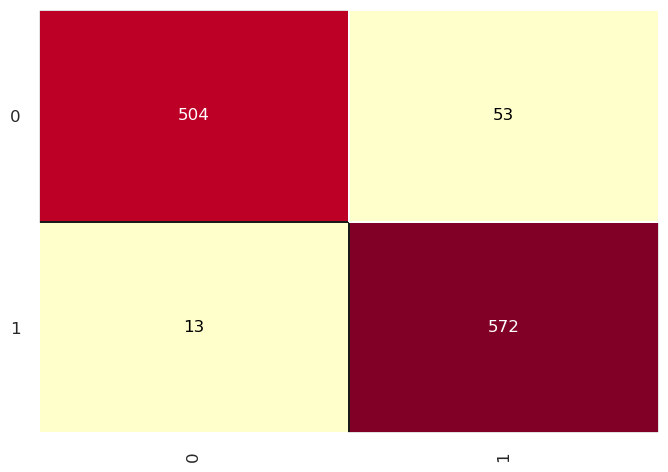

In [56]:
cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [57]:
classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94       557
           1       0.92      0.98      0.95       585

    accuracy                           0.94      1142
   macro avg       0.95      0.94      0.94      1142
weighted avg       0.94      0.94      0.94      1142



#### Logistic Regression

In [58]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 1, max_iter=1000)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

#### Result

#### 73.81% accuracy, isn't a good model.

In [59]:
logistic_normal = 0.7381786339754816

0.7933450087565674

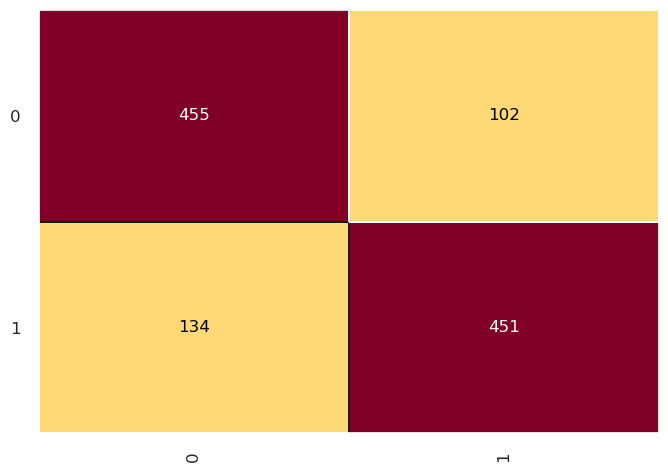

In [60]:
cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [61]:
logistic_normal = (classification_report(y_test, previsoes))
print(logistic_normal)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       557
           1       0.82      0.77      0.79       585

    accuracy                           0.79      1142
   macro avg       0.79      0.79      0.79      1142
weighted avg       0.79      0.79      0.79      1142



#### SVM
- Here we will use the SVM Model, we will test Three Kernels (Linear, RBF and Poly).
Applying GridSearch

In [62]:
from sklearn.svm import SVC
model = SVC()

kernel = ['linear', 'rbf', 'poly', 'sigmoid']
c = np.array([3, 4, 5])
polinomio = np.array([2, 3, 4, 5])
gamma = ['auto', 'scale']
values_grid = {'C': c, 'kernel': kernel, 'degree': polinomio, 'gamma': gamma}
gridSVM = GridSearchCV(estimator = model, param_grid = values_grid, cv = 2, n_jobs = -1)
gridSVM.fit(X_train, y_train)

print('Kernel: ', gridSVM.best_estimator_.kernel)
print('C: ', gridSVM.best_estimator_.C)
print('Polinomio', gridSVM.best_estimator_.degree)
print('Gamma', gridSVM.best_estimator_.gamma)
print('Score: ', gridSVM.best_score_)

Kernel:  rbf
C:  5
Polinomio 2
Gamma scale
Score:  0.8640120210368145


#### Running SVM

In [63]:
svm = SVC(kernel = 'poly',degree = 5, gamma = 'auto', random_state = 1, C = 5.0)
svm.fit(X_train, y_train)
previsoes = svm.predict(X_test)

#### Result

#### We had 87.12% accuracy, it's a great model, but compared to others, we have better results.

In [64]:
score_svm = 0.8712784588441331

0.8861646234676007

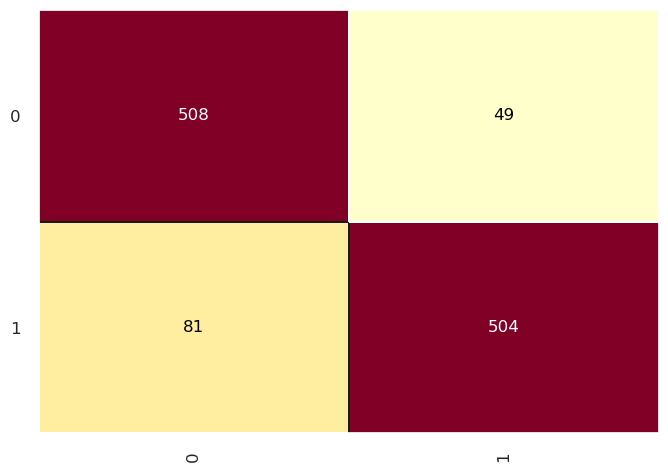

In [65]:
cm = ConfusionMatrix(svm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [66]:
svm = classification_report(y_test, previsoes)
print(svm)

              precision    recall  f1-score   support

           0       0.86      0.91      0.89       557
           1       0.91      0.86      0.89       585

    accuracy                           0.89      1142
   macro avg       0.89      0.89      0.89      1142
weighted avg       0.89      0.89      0.89      1142



#### Checking the results.

In [75]:
Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Type':'Gaussian',
               'Precision':score_naive_gaussian}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_tree}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Type': 'Gini',
               'Precision':score_random}


K_Means_dict_v2 = {'Model':'Means',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_kmeans}

KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Type':'-',
               'Precision':score_knn}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Type':'-',
               'Precision':logistic_normal}

svm = {'Model':'SVM',
               'Scaling':'Standard Data',
               'Type':'Poly',
               'Precision':score_svm}





resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'K-Means':pd.Series(K_Means_dict_v2),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                       'SVM':pd.Series(svm),
                      })

resume

,Naive Bayes,Decision Tree,Random Forest,K-Means,KNN,Logistic Regression,SVM
Model,Naive Bayes,Decision Tree,Random Forest,Means,KNN,Logistic Regression,SVM
Scaling,Normal Data,Normal Data,Normal Data,Normal,Normal,Normal Data,Standard Data
Type,Gaussian,Gini,Gini,-,-,-,Poly
Precision,0.6331,0.886165,0.943958,0.425569,0.831461,precision recall f1-score ...,0.871278


## <font color='blue'> 4. Conclusion. </font>

#### We can see that we have numerical and continuous data, in our database we have a considerable amount of data, which facilitates our work, when we look at our data we can see that we have some null values ​​which makes treatment necessary, all values nulls were replaced by the mode.

#### Looking at the correlation between the data we can consider that we have some "strong" correlations so we removed all variables with correlation above 0.6, when we looked at our exploratory analysis I could not see a great correlation of our target variable with our categorical variables, now when we compare it with our continuous variables we can see that excluding the Recency variable, all the other continuous variables, the higher the value, the more likely to have a positive answer.

#### Talking about the machine learning models, we had to balance the classes, as in our database we have much more negative response data than positive, so we used OverSampling, when running the models we had some not so good models and some models exceptional, the best model was Extra Trees with 97.72% accuracy, the model was able to predict both results.

#### When we look at the most important variables of the models we have some interesting results, practically in all of them the variable Recency is considered important but not with a very different weight from the others, we also see the variable Income and the variable MntGoldProds as important variables for the result of the model.

#### <font color='red'> if you liked the analysis, leave a "like" (up arrow), and comment what you think of the study, if you have any suggestions I would be happy to hear from you. </font>